### Первичный анализ данных

На данном этапе проведён разведочный анализ данных (Exploratory Data Analysis, EDA) для датасета CarDekho, содержащего информацию об автомобилях и их характеристиках.

### Загрузка данных
Из исходного файла был загружен датасет, содержащий 8128 записей и 12 признаков. Признаки включают в себя как числовые (например, year, km_driven, engine), так и категориальные переменные (например, fuel_type, transmission, seller_type). Предварительная проверка выявила наличие пропущенных значений в некоторых столбцах.

### Вывод базовой информации
*   **Размер датасета:** 8128 строк, 12 столбцов.
*   **Статистические характеристики:** Для числовых признаков были рассчитаны среднее значение, стандартное отклонение, минимум, максимум и квартильные показатели. Для категориальных переменных определено количество уникальных значений и мода (наиболее частая категория).

### Визуализация распределений
*   **Целевая переменная selling_price:** Построены гистограмма и боксплот для анализа распределения цен. Распределение является правосторонне асимметричным, что указывает на преобладание автомобилей низкого и среднего ценового сегмента. Боксплот подтвердил наличие значительных выбросов среди дорогих моделей.
*   **Признаки:** Для всех числовых признаков построены гистограммы с наложением кривой плотности для оценки формы распределений. Для категориальных признаков визуализированы столбчатые диаграммы, отражающие частоту встречаемости различных категорий (тип топлива, коробки передач, продавца и др.).

### Основные выводы:
1.  Распределение целевой переменной selling_price несимметрично, с концентрацией наблюдений в области низких и средних значений.
2.  Масштабы числовых признаков существенно различаются, что указывает на необходимость их стандартизации или нормализации для многих алгоритмов машинного обучения.
3.  В столбцах mileage, engine, max_power и seats присутствуют пропущенные значения, требующие обработки (например, импутации).
4.  В данных обнаружены выбросы, которые могут негативно повлиять на качество моделей, особенно чувствительных к ним (например, линейная регрессия). Требуется применение методов их обработки.

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB

Первые 5 строк датасета:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzi

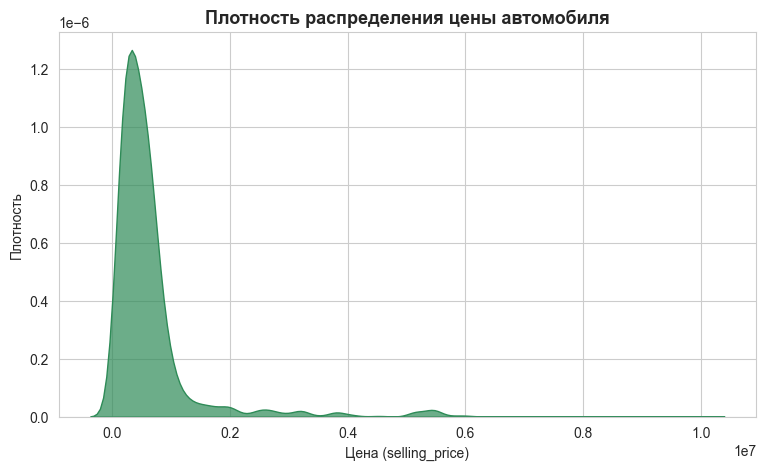

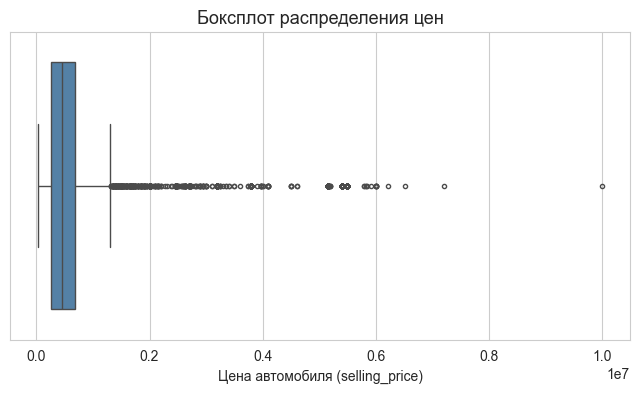

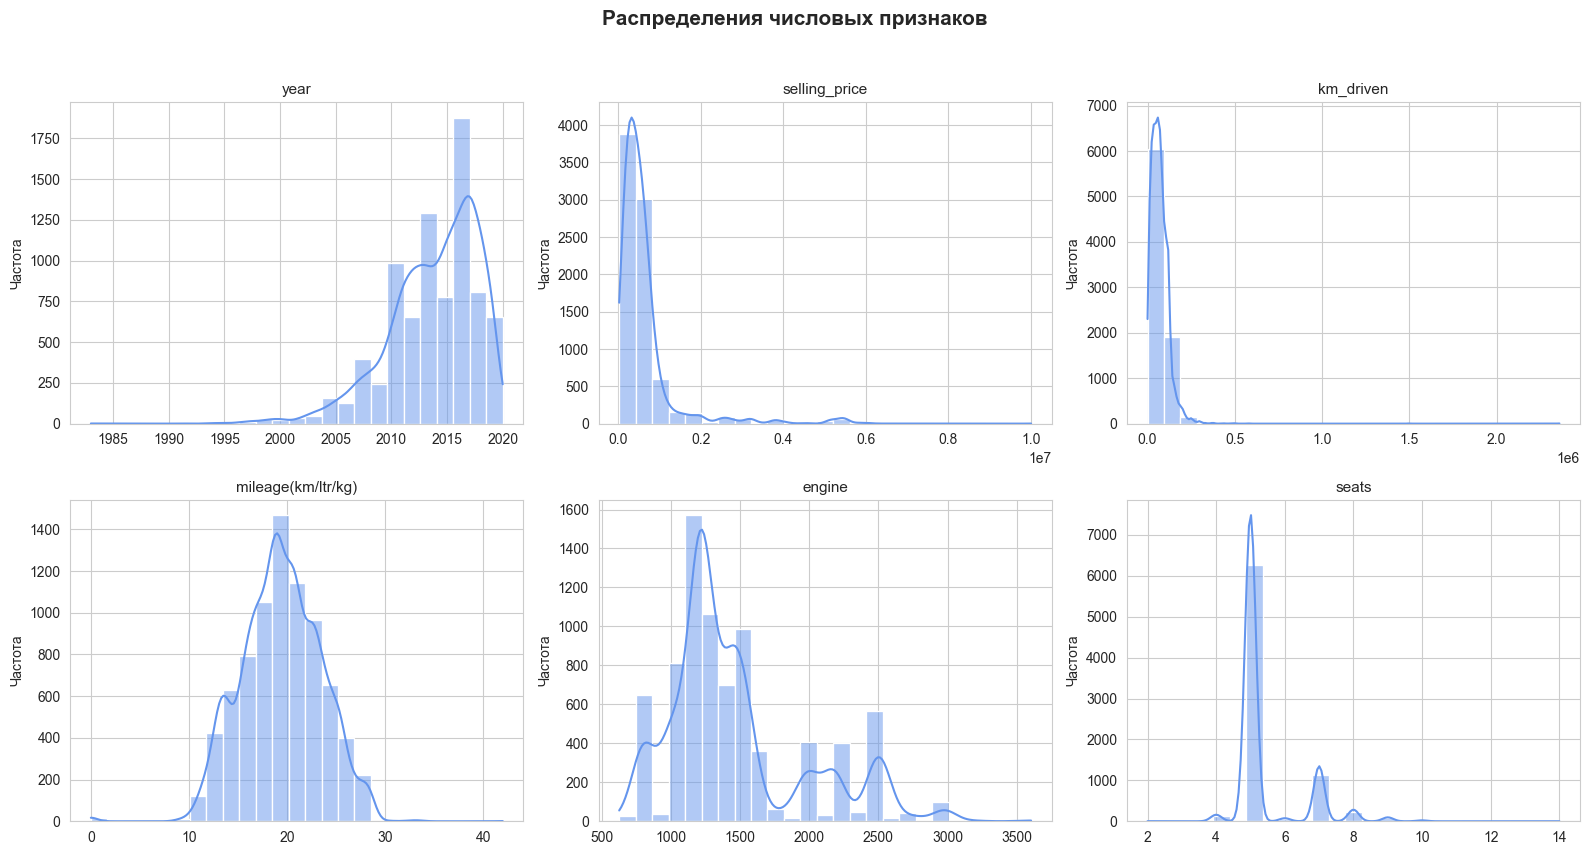

C:\Users\kapit\AppData\Local\Temp\ipykernel_30952\1627762431.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i],
C:\Users\kapit\AppData\Local\Temp\ipykernel_30952\1627762431.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i],
C:\Users\kapit\AppData\Local\Temp\ipykernel_30952\1627762431.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i],
C:\Users\k

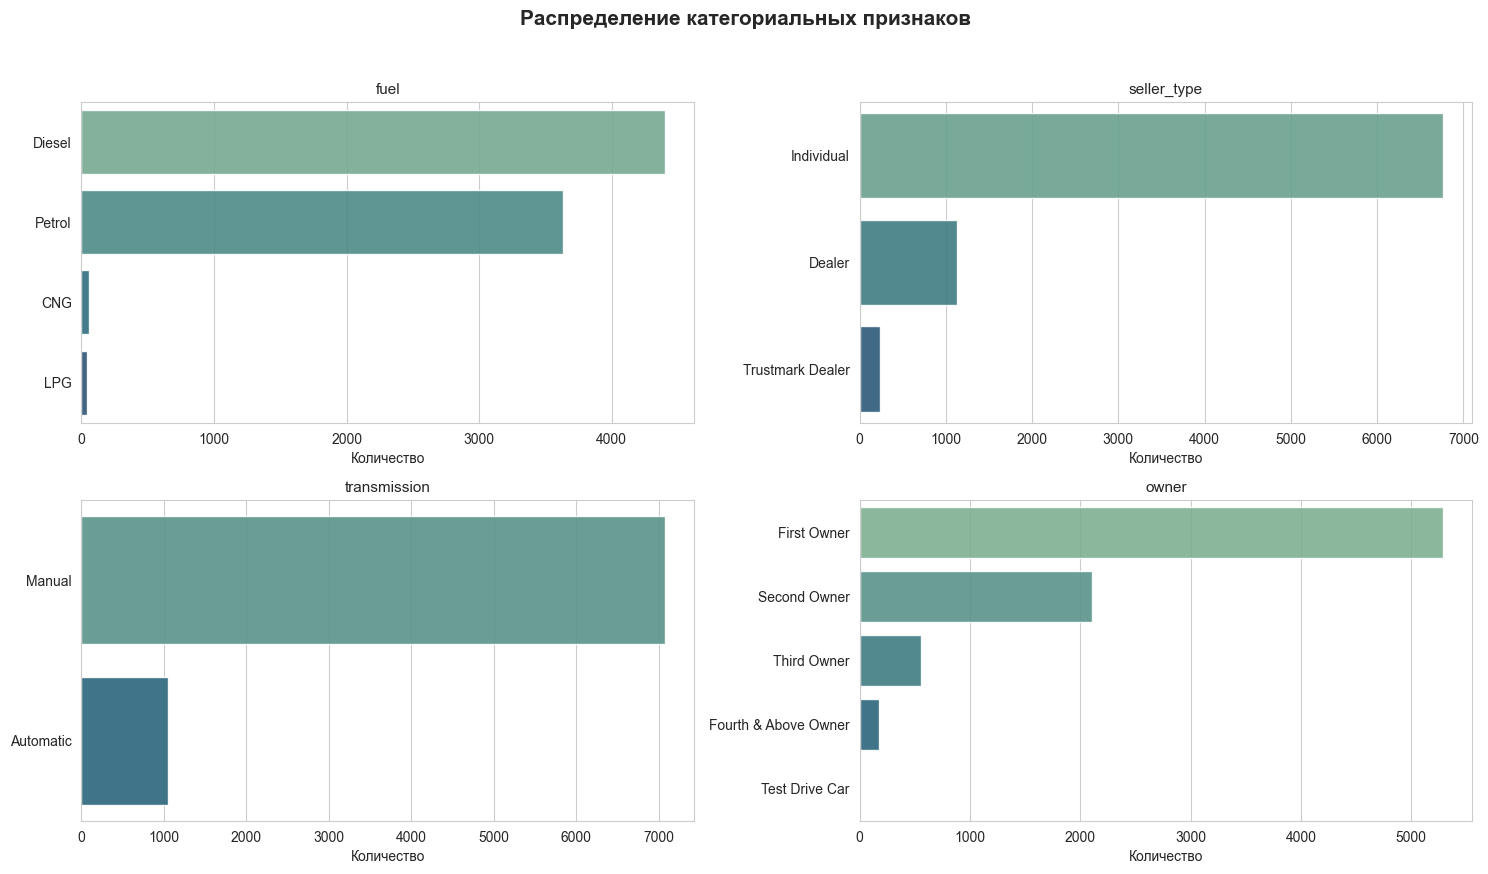


Статистика по целевой переменной (selling_price)
Среднее: 638,271.81
Медиана: 450,000.00
Стандартное отклонение: 806,253.40
Минимум: 29,999.00
Максимум: 10,000,000.00
25-й перцентиль: 254,999.00
75-й перцентиль: 675,000.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set_style("whitegrid")

data = pd.read_csv("cardekho.csv")

print("Общая информация")
data.info()
print("\nПервые 5 строк датасета:")
print(data.head())

print(f"\nРазмер данных: {data.shape[0]} наблюдений, {data.shape[1]} признаков\n")

desc = data.describe().T
desc["median"] = data.median(numeric_only=True)
desc["missing_values"] = data.isnull().sum()
print("\nОписательная статистика")
print(desc.round(2))

categorical_cols = data.select_dtypes(include="object").columns
print("\nКатегориальные признаки:", list(categorical_cols))

for col in categorical_cols:
    print(f"\n{col} — количество уникальных значений: {data[col].nunique()}")
    print("Топ-5 категорий:")
    print(data[col].value_counts().head(5))

plt.figure(figsize=(9,5))
sns.kdeplot(data["selling_price"], fill=True, color="#2E8B57", alpha=0.7)
plt.title("Плотность распределения цены автомобиля", fontsize=13, fontweight='bold')
plt.xlabel("Цена (selling_price)")
plt.ylabel("Плотность")
plt.show()

num_cols = data.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(16, 4 * (len(num_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], bins=25, ax=axes[i], color="#6495ED", kde=True)
    axes[i].set_title(f"{col}", fontsize=11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Частота")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Распределения числовых признаков", fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

cat_cols = [col for col in categorical_cols if data[col].nunique() <= 15]
fig, axes = plt.subplots(nrows=len(cat_cols)//2 + 1, ncols=2, figsize=(15, 4 * (len(cat_cols)//2 + 1)))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i],
                  palette="crest", alpha=0.9)
    axes[i].set_title(f"{col}", fontsize=11)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("Количество")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Распределение категориальных признаков", fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

price_stats = {
    "Среднее": data["selling_price"].mean(),
    "Медиана": data["selling_price"].median(),
    "Стандартное отклонение": data["selling_price"].std(),
    "Минимум": data["selling_price"].min(),
    "Максимум": data["selling_price"].max(),
    "25-й перцентиль": data["selling_price"].quantile(0.25),
    "75-й перцентиль": data["selling_price"].quantile(0.75)
}

print("\nСтатистика по целевой переменной (selling_price)")
for k, v in price_stats.items():
    print(f"{k}: {v:,.2f}")


### Загрузка данных
Из CSV-файла cardekho.csv считывается исходная таблица с признаками и целевой переменной (selling_price — цена автомобиля).

### Анализ и обработка пропущенных значений
Выводится количество пропусков до обработки. Для числовых признаков пропуски заполняются средними значениями столбцов. Для категориальных признаков пропуски заполняются наиболее часто встречающимися значениями (модой). После обработки выводится проверочная статистика, подтверждающая отсутствие пропусков.

### Преобразование и отбор признаков
Из строковых полей числовых признаков извлекаются числовые значения с помощью регулярных выражений. Формируется итоговый датасет, содержащий только выбранные числовые и категориальные признаки вместе с целевой переменной.

### Кодирование категориальных переменных
Категориальные признаки преобразуются в числовой формат с помощью One-Hot Encoding с удалением первого уровня (параметр drop_first=True) для избежания мультиколлинеарности.

### Стандартизация числовых признаков
С помощью StandardScaler все числовые признаки масштабируются таким образом, чтобы их распределение имело среднее значение, равное 0, и стандартное отклонение, равное 1. Это необходимо для корректной работы алгоритмов машинного обучения, чувствительных к масштабу данных.

В итоге получаем следующее:
y — целевая переменная (selling_price), отражающая цену автомобиля.
X — матрица признаков, содержащая все обработанные, закодированные и стандартизированные характеристики автомобилей.

В конце выводятся итоговое количество признаков и первые строки подготовленной матрицы X для визуальной проверки корректности выполненных преобразований.

In [8]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("cardekho.csv")

print("Пропуски до обработки")
print(data.isna().sum())

num_cols = ["year", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power", "seats"]

for col in num_cols:
    data[col] = data[col].astype(str).str.extract(r'([\d.]+)')  
    data[col] = data[col].astype(float) 

for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

cat_cols = ["fuel", "seller_type", "transmission", "owner"]
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nПропуски после обработки")
print(data.isnull().sum())

selected_cols = num_cols + cat_cols
data = data[selected_cols + ["selling_price"]]

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

print("\nИтоговое число признаков: ", X.shape[1])
X.head()


Пропуски до обработки
name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

Пропуски после обработки
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

Итоговое число признаков:  16


,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.05,1.34,1.00,-0.42,-0.50,-0.44,True,False,False,True,False,True,False,False,False,False
1,0.05,0.89,0.43,0.08,0.34,-0.44,True,False,False,True,False,True,False,True,False,False
2,-1.93,1.24,-0.43,0.08,-0.38,-0.44,False,False,True,True,False,True,False,False,False,True
3,-0.94,1.01,0.90,-0.13,-0.04,-0.44,True,False,False,True,False,True,False,False,False,False
4,-1.68,0.89,-0.83,-0.32,-0.09,-0.44,False,False,True,True,False,True,False,False,False,False


### Анализ мультиколлинеарности

Проводится анализ взаимной корреляции признаков и расчет показателей инфляции дисперсии (VIF) для выявления мультиколлинеарности.

### Подготовка данных
Создается копия матрицы признаков `X` с явным приведением типов к вещественным числам для обеспечения корректности вычислений. Проверяется наличие пропущенных значений, которые при обнаружении заполняются нулями.

### Построение матрицы корреляций
Строится тепловая карта матрицы корреляций между всеми признаками с аннотациями коэффициентов корреляции. Визуализация помогает идентифицировать сильно коррелирующие пары признаков.

### Расчет показателей VIF
Для каждого признака вычисляется показатель инфляции дисперсии (Variance Inflation Factor), который количественно оценивает степень мультиколлинеарности. VIF показывает, насколько дисперсия коэффициента регрессии увеличивается due to корреляции с другими признаками.

### Вывод результатов
Отображается отсортированная по убыванию VIF таблица с показателями для каждого признака. Высокие значения VIF (обычно >5-10) указывают на наличие проблем мультиколлинеарности, что может требовать дальнейших действий по отбору признаков.

### Анализ результатов VIF

На основе расчетов выявлены следующие закономерности:

**Признаки с критической мультиколлинеарностью (VIF > 10):**
- transmission_Manual (VIF = 12.30) - демонстрирует очень высокую корреляцию с другими признаками

**Признаки с выраженной мультиколлинеарностью (VIF 5-10):**
- fuel_Diesel (9.35), seller_type_Individual (8.32), fuel_Petrol (7.57) - требуют внимания
- engine (5.32) - находится на границе допустимого значения

**Признаки с умеренной мультиколлинеарностью (VIF 2-5):**
- max_power (3.16), mileage (2.62), seats (2.17) - приемлемые значения

**Признаки с незначительной мультиколлинеарностью (VIF < 2):**
- Остальные 8 признаков, включая year, km_driven и различные категории владельцев


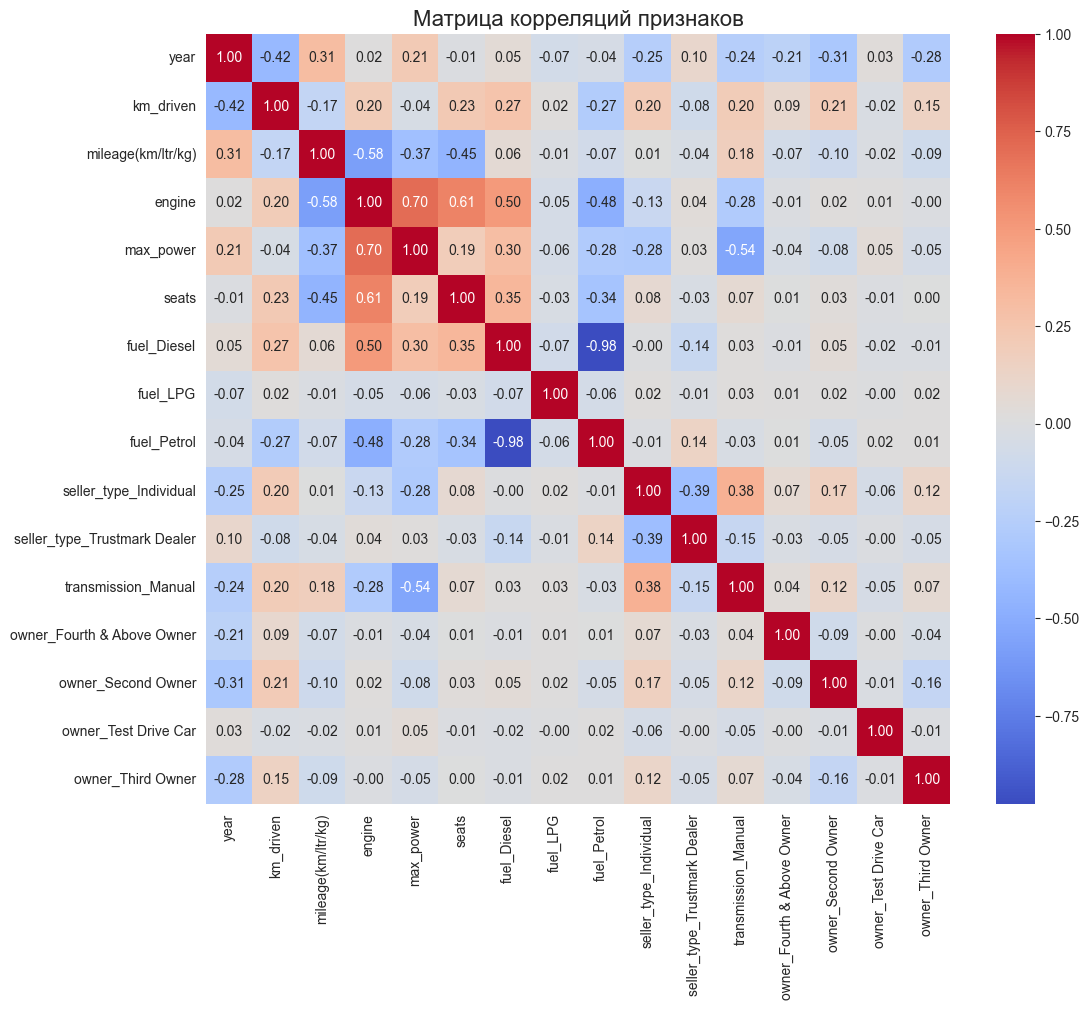


VIF по признакам

                         feature   VIF
11           transmission_Manual 12.30
6                    fuel_Diesel  9.35
9         seller_type_Individual  8.32
8                    fuel_Petrol  7.57
3                         engine  5.32
4                      max_power  3.16
2             mileage(km/ltr/kg)  2.62
5                          seats  2.17
0                           year  1.95
13            owner_Second Owner  1.72
1                      km_driven  1.42
15             owner_Third Owner  1.30
10  seller_type_Trustmark Dealer  1.26
12    owner_Fourth & Above Owner  1.13
7                       fuel_LPG  1.07
14          owner_Test Drive Car  1.01


In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X_vif = X.copy().astype(float)

if X_vif.isnull().sum().sum() > 0:
    X_vif = X_vif.fillna(0)

corr_matrix = X_vif.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляций признаков", fontsize=16)
plt.show()

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVIF по признакам\n")
print(vif_data.sort_values(by="VIF", ascending=False))


### Построение и оценка регрессионных моделей

Проводится сравнение линейной и гребневой регрессии для предсказания стоимости автомобилей на основе подготовленных признаков.

### Подготовка данных
Выбираются данные для моделирования с проверкой наличия масштабированной версии. Выполняется обработка пропущенных и бесконечных значений: для матрицы признаков заменяются на средние по столбцам, для целевой переменной - на общее среднее значение.

### Разделение на выборки
Данные разделяются на обучающую и тестовую выборки в соотношении 75/25 с фиксированным random_state для воспроизводимости результатов. Для кросс-валидации используется K-Fold с 6 фолдами.

### Обучение и оценка линейной регрессии
Модель линейной регрессии обучается на тренировочных данных с последующей кросс-валидацией. Рассчитываются метрики качества на тестовой выборке: RMSE, R² и MAPE.

### Обучение и оценка гребневой регрессии
Модель Ridge-регрессии с параметром alpha=1.0 проходит аналогичную процедуру обучения и оценки для сравнения эффективности регуляризации.

### Визуализация результатов
Строятся диаграммы рассеяния "предсказанные vs фактические значения" для обеих моделей с линией идеального предсказания для визуальной оценки качества.


### Анализ результатов

1. **Сравнительная эффективность моделей:** Обе модели демонстрируют схожие результаты, что свидетельствует об отсутствии значительного переобучения в линейной регрессии.

2. **Качество предсказаний:** Модели объясняют около 69% дисперсии целевой переменной (R² = 0.69), что можно считать удовлетворительным результатом для задачи регрессии.

3. **Точность прогноза:** Высокое значение MAPE (75%) указывает на значительную среднюю ошибку в процентах, что может быть связано с большим разбросом цен в данных и наличием выбросов.

4. **Эффект регуляризации:** Гребневая регрессия не показала существенного улучшения по сравнению с линейной, что говорит о том, что мультиколлинеарность не является критической проблемой в данных.

5. **Стабильность моделей:** Результаты кросс-валидации близки к метрикам на тестовой выборке, что подтверждает устойчивость моделей.

Линейная регрессия:
Средний R² (CV): 0.674
RMSE: 438,367.04
R²: 0.692
MAPE: 75.41%

Гребневая регрессия (Ridge):
Средний R² (CV): 0.674
RMSE: 438,364.76
R²: 0.692
MAPE: 75.40%


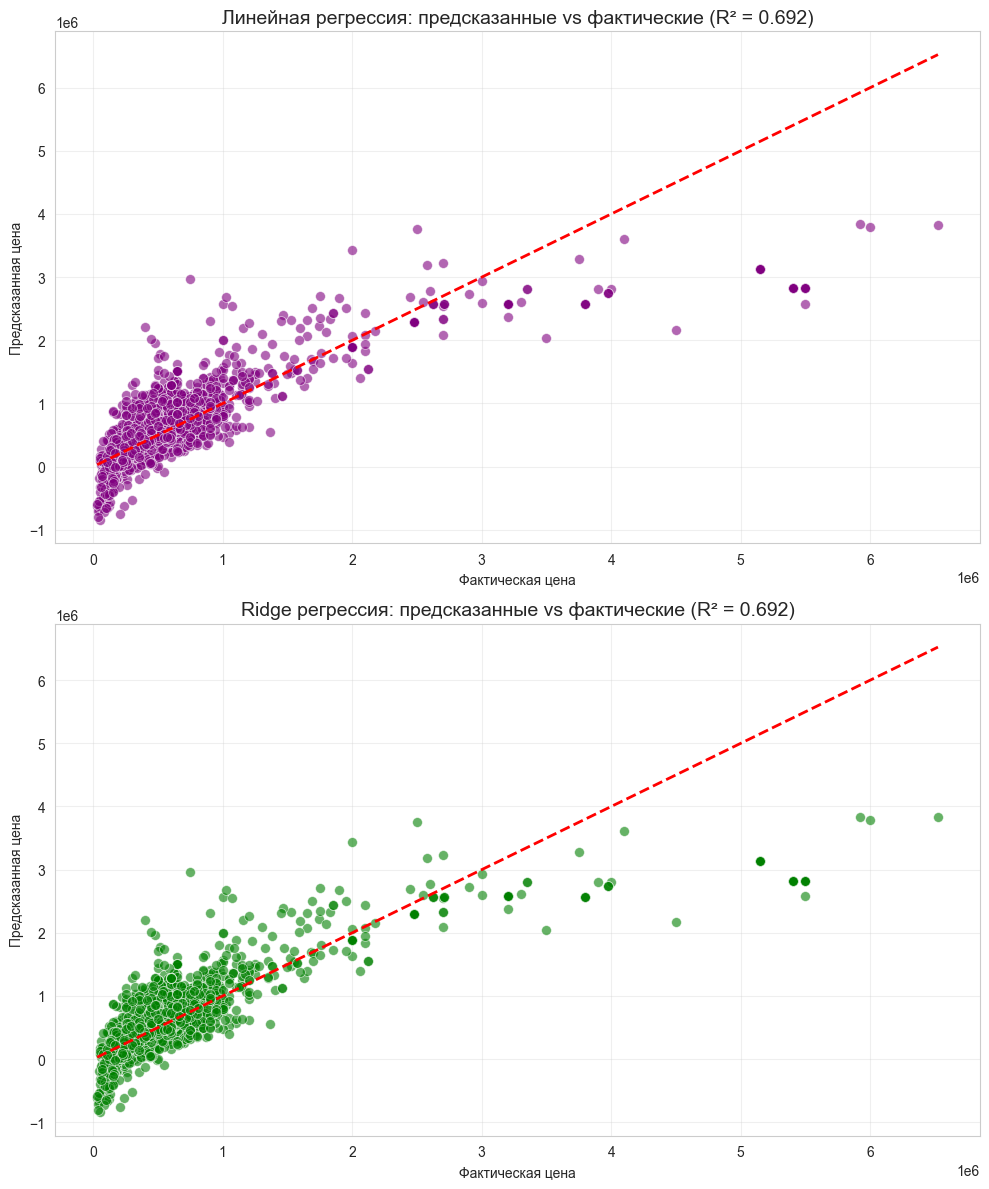

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_model = X_scaled.copy() if 'X_scaled' in locals() else X.copy()
y_model = y.copy()
if isinstance(X_model, np.ndarray):
    X_model = np.where(np.isfinite(X_model), X_model, np.nan)
    col_means = np.nanmean(X_model, axis=0)
    nan_indices = np.where(np.isnan(X_model))
    X_model[nan_indices] = np.take(col_means, nan_indices[1])
else:
    X_model.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_model.fillna(X_model.mean(), inplace=True)

if isinstance(y_model, pd.Series):
    y_model.fillna(y_model.mean(), inplace=True)
else:
    y_model = np.where(np.isfinite(y_model), y_model, np.nan)
    y_model = np.nan_to_num(y_model, nan=np.nanmean(y_model))

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.25, random_state=42
)

cv = KFold(n_splits=6, shuffle=True, random_state=42)

linear_model = LinearRegression()
cv_r2_linear = cross_val_score(linear_model, X_train, y_train, cv=cv, scoring='r2')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear) * 100

print("Линейная регрессия:")
print(f"Средний R² (CV): {cv_r2_linear.mean():.3f}")
print(f"RMSE: {rmse_linear:,.2f}")
print(f"R²: {r2_linear:.3f}")
print(f"MAPE: {mape_linear:.2f}%")

ridge_model = Ridge(alpha=1.0)
cv_r2_ridge = cross_val_score(ridge_model, X_train, y_train, cv=cv, scoring='r2')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

print("\nГребневая регрессия (Ridge):")
print(f"Средний R² (CV): {cv_r2_ridge.mean():.3f}")
print(f"RMSE: {rmse_ridge:,.2f}")
print(f"R²: {r2_ridge:.3f}")
print(f"MAPE: {mape_ridge:.2f}%")

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.scatterplot(x=y_test, y=y_pred_linear, ax=axes[0], color='purple', s=50, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_title(f"Линейная регрессия: предсказанные vs фактические (R² = {r2_linear:.3f})", fontsize=14)
axes[0].set_xlabel("Фактическая цена")
axes[0].set_ylabel("Предсказанная цена")
axes[0].grid(True, alpha=0.3)

sns.scatterplot(x=y_test, y=y_pred_ridge, ax=axes[1], color='green', s=50, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1].set_title(f"Ridge регрессия: предсказанные vs фактические (R² = {r2_ridge:.3f})", fontsize=14)
axes[1].set_xlabel("Фактическая цена")
axes[1].set_ylabel("Предсказанная цена")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### Анализ метода главных компонент (PCA) и сравнение моделей

Проводится снижение размерности данных с помощью PCA и сравнение эффективности Ridge-регрессии на исходных и преобразованных признаках.

### Подготовка данных и масштабирование
Исходные данные разделяются на матрицу признаков `X` и целевую переменную `y` (цена автомобиля). Все признаки стандартизируются с помощью StandardScaler для приведения к единому масштабу, что является обязательным требованием для корректной работы PCA.

### Анализ объясненной дисперсии
Строится полная PCA модель для определения оптимального числа компонент. Визуализируются:
- **График объясненной дисперсии**: доля и накопленная объясненная дисперсия для каждой компоненты
- **Scree plot**: собственные значения компонент с порогом Кайзера (значение = 1)

### Определение оптимального числа компонент
Рассчитывается минимальное число главных компонент, необходимое для объяснения 85% и 95% дисперсии исходных данных. Для дальнейшего анализа выбирается вариант с 85% дисперсии как обеспечивающий баланс между сокращением размерности и сохранением информации.

### Анализ нагрузок компонент
Строится тепловая карта нагрузок первых главных компонент, показывающая вклад исходных признаков в формирование каждой новой компоненты. Это позволяет интерпретировать смысл полученных компонент.

### Сравнение эффективности моделей
Проводится сравнение Ridge-регрессии на исходных признаках и на PCA-признаках с использованием кросс-валидации и тестовой выборки. Оцениваются метрики R² и RMSE.

### Визуализация предсказаний
Строятся диаграммы рассеяния "предсказанные vs фактические значения" для обеих моделей с линией идеального предсказания.

### Выводы

1. **Эффективность снижения размерности**: PCA позволил сократить количество признаков с 16 до 9 при сохранении 85% исходной дисперсии.

2. **Качество моделей**: Модель на исходных признаках демонстрирует немного лучшие показатели (R² = 0.692 против 0.663), что указывает на потерю части полезной информации при снижении размерности.

3. **Стабильность результатов**: Обе модели показывают схожие результаты кросс-валидации, что свидетельствует об устойчивости оценок.

4. **Компромисс интерпретируемость/качество**: PCA-модель обеспечивает лучшую интерпретируемость за счет сокращения размерности, но ценой небольшого снижения точности предсказаний.

5. **Практическая рекомендация**: Для задач, где важна максимальная точность предсказания, предпочтительнее использовать исходные признаки. Для задач, где критична интерпретируемость или вычислительная эффективность, можно использовать PCA-признаки.

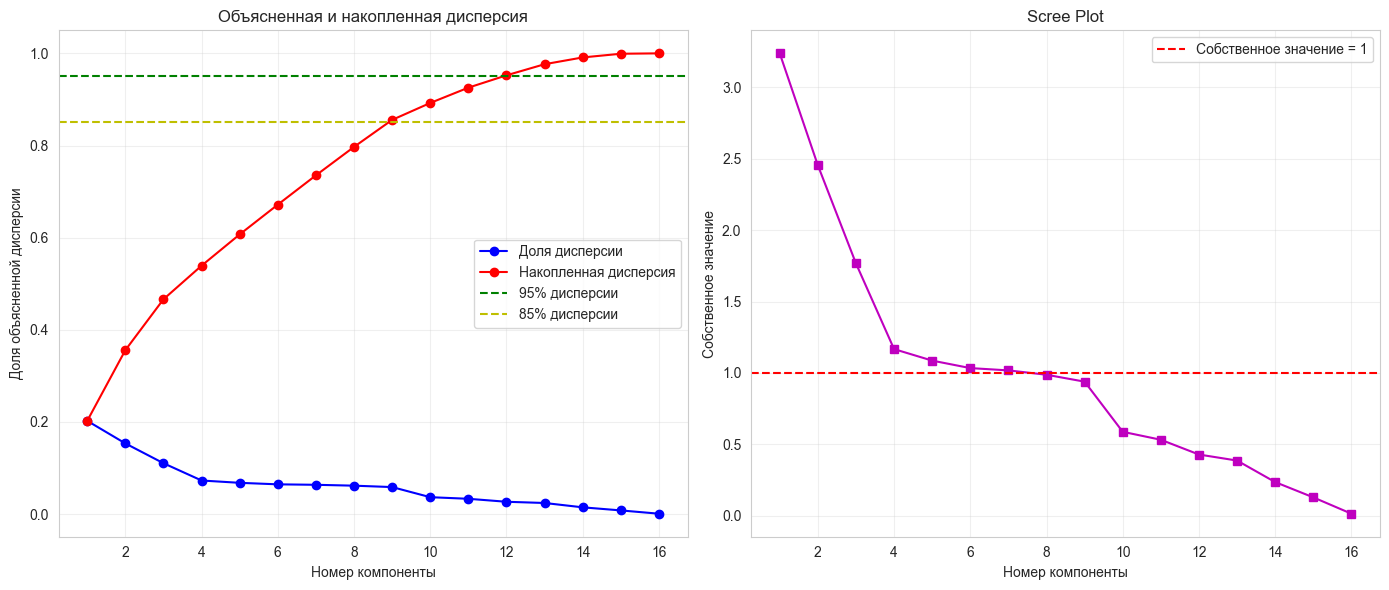

Оптимальное число компонент для 85% объясненной дисперсии: 9
Оптимальное число компонент для 95% объясненной дисперсии: 12


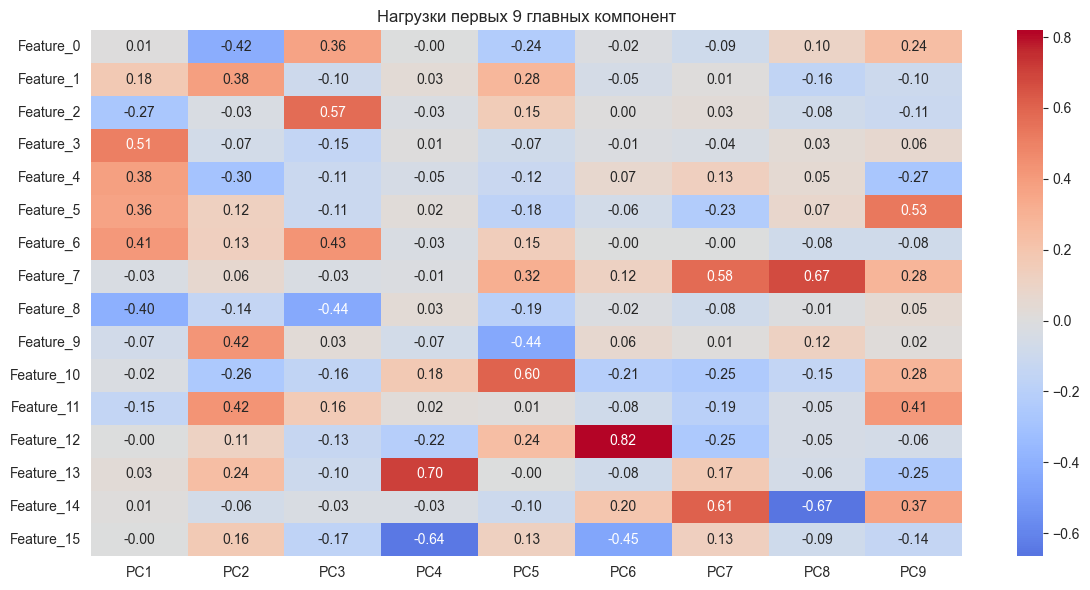


Исходные признаки (16 признаков):
R² (CV): 0.668
R² (тест): 0.692
RMSE: 438,364.76

PCA-признаки (9 компонент):
R² (CV): 0.642
R² (тест): 0.663
RMSE: 458,420.43


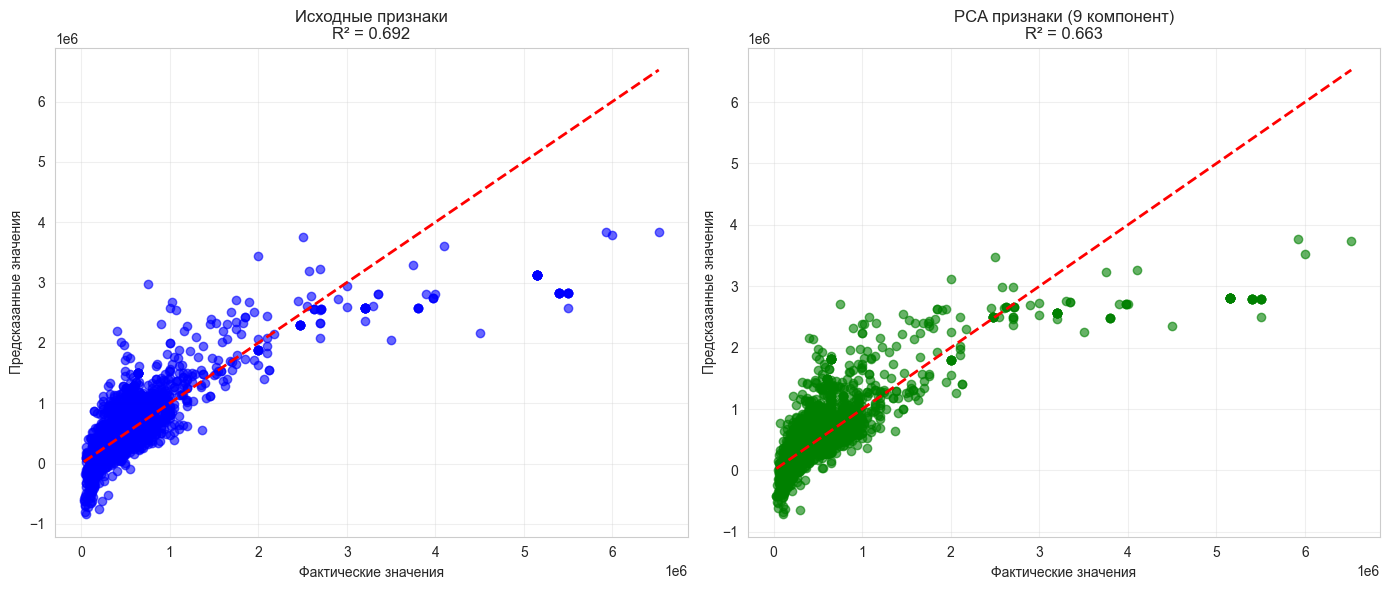

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
# Замените 'selling_price' на фактическое имя целевого столбца, если оно другое
X = data.drop(columns=['selling_price'])
y = data['selling_price']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
X_full_pca = pca_full.fit_transform(X_scaled)

explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var)+1), explained_var, 'bo-', label='Доля дисперсии')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'ro-', label='Накопленная дисперсия')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% дисперсии')
plt.axhline(y=0.85, color='y', linestyle='--', label='85% дисперсии')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Объясненная и накопленная дисперсия')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_full.explained_variance_)+1), pca_full.explained_variance_, 'ms-')
plt.axhline(y=1, color='r', linestyle='--', label='Собственное значение = 1')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.title('Scree Plot')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

optimal_95 = np.argmax(cumulative_var >= 0.95) + 1
optimal_85 = np.argmax(cumulative_var >= 0.85) + 1

print(f"Оптимальное число компонент для 85% объясненной дисперсии: {optimal_85}")
print(f"Оптимальное число компонент для 95% объясненной дисперсии: {optimal_95}")


n_components = optimal_85 #optimal_95 выдаёт +- тот же R^2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


if hasattr(X_scaled, 'columns'):
    feature_names = X_scaled.columns
else:
    
    feature_names = [f'Feature_{i}' for i in range(X_scaled.shape[1])]

plt.figure(figsize=(12, 6))
loadings = pd.DataFrame(pca.components_.T, 
                       index=feature_names, 
                       columns=[f'PC{i+1}' for i in range(n_components)])
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title(f'Нагрузки первых {n_components} главных компонент')
plt.tight_layout()
plt.show()


X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=42)


ridge_orig = Ridge(alpha=1.0)
cv_orig = cross_val_score(ridge_orig, X_train_orig, y_train, cv=5, scoring='r2')
ridge_orig.fit(X_train_orig, y_train)
y_pred_orig = ridge_orig.predict(X_test_orig)


ridge_pca = Ridge(alpha=1.0)
cv_pca = cross_val_score(ridge_pca, X_train_pca, y_train_pca, cv=5, scoring='r2')
ridge_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = ridge_pca.predict(X_test_pca)

print(f"\nИсходные признаки ({X_scaled.shape[1]} признаков):")
print(f"R² (CV): {cv_orig.mean():.3f}")
print(f"R² (тест): {r2_score(y_test, y_pred_orig):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_orig)):,.2f}")

print(f"\nPCA-признаки ({n_components} компонент):")
print(f"R² (CV): {cv_pca.mean():.3f}")
print(f"R² (тест): {r2_score(y_test_pca, y_pred_pca):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)):,.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test, y_pred_orig, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Фактические значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title(f'Исходные признаки\nR² = {r2_score(y_test, y_pred_orig):.3f}')
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test_pca, y_pred_pca, alpha=0.6, color='green')
axes[1].plot([y_test_pca.min(), y_test_pca.max()], [y_test_pca.min(), y_test_pca.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Фактические значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title(f'PCA признаки ({n_components} компонент)\nR² = {r2_score(y_test_pca, y_pred_pca):.3f}')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Сравнение линейных моделей до и после PCA на данных CarDekho

1. **Импорт библиотек**
Подключаются библиотеки для работы с данными (pandas, numpy), построения графиков (matplotlib, seaborn), машинного обучения (scikit-learn) и анализа ошибок.

2. **Подготовка данных**
Исходные данные разделяются на матрицу признаков X и целевую переменную y (selling_price - цена автомобиля). Все признаки стандартизируются с помощью StandardScaler для приведения к единому масштабу.

3. **Применение PCA**
Для снижения размерности применяется метод главных компонент (PCA). Сначала анализируется полный набор компонент для определения оптимального числа, сохраняющего 85% дисперсии исходных данных. Строятся графики объясненной дисперсии и Scree plot.

4. **Разделение данных на обучающую и тестовую выборки**
Данные делятся в соотношении 75/25 (train_test_split), причём формируются два набора:
- исходные признаки (X_train_orig, X_test_orig),
- PCA-признаки (X_train_pca, X_test_pca).

5. **Обучение моделей**
Сравниваются две модели регрессии:
- Linear Regression — обычная линейная регрессия;
- Ridge Regression — линейная регрессия с L2-регуляризацией (alpha=1.0).
Каждая модель обучается на исходных данных и на данных после PCA.

6. **Оценка качества моделей**
Для каждой модели вычисляются метрики:
- R² — коэффициент детерминации (качество аппроксимации),
- RMSE — среднеквадратичная ошибка,
- MAPE — средняя абсолютная процентная ошибка.

7. **Визуализация результатов**
Строятся 4 графика «фактические vs предсказанные значения» для каждой модели в едином масштабе осей. Красная пунктирная линия показывает идеальное совпадение (y = x). На графиках отображаются значения R² и MAPE для удобства сравнения.

8. **Сравнение результатов**
Формируется сводная таблица comparison, содержащая метрики для всех четырёх вариантов:
- Linear Regression (исходные признаки);
- Ridge Regression (исходные признаки);
- Linear Regression (PCA-признаки);
- Ridge Regression (PCA-признаки).

9. **Анализ эффективности PCA**
Сравнивается количество признаков до и после применения PCA, оценивается степень сокращения размерности и её влияние на качество моделей. Анализируется компромисс между уменьшением размерности и сохранением предсказательной способности.


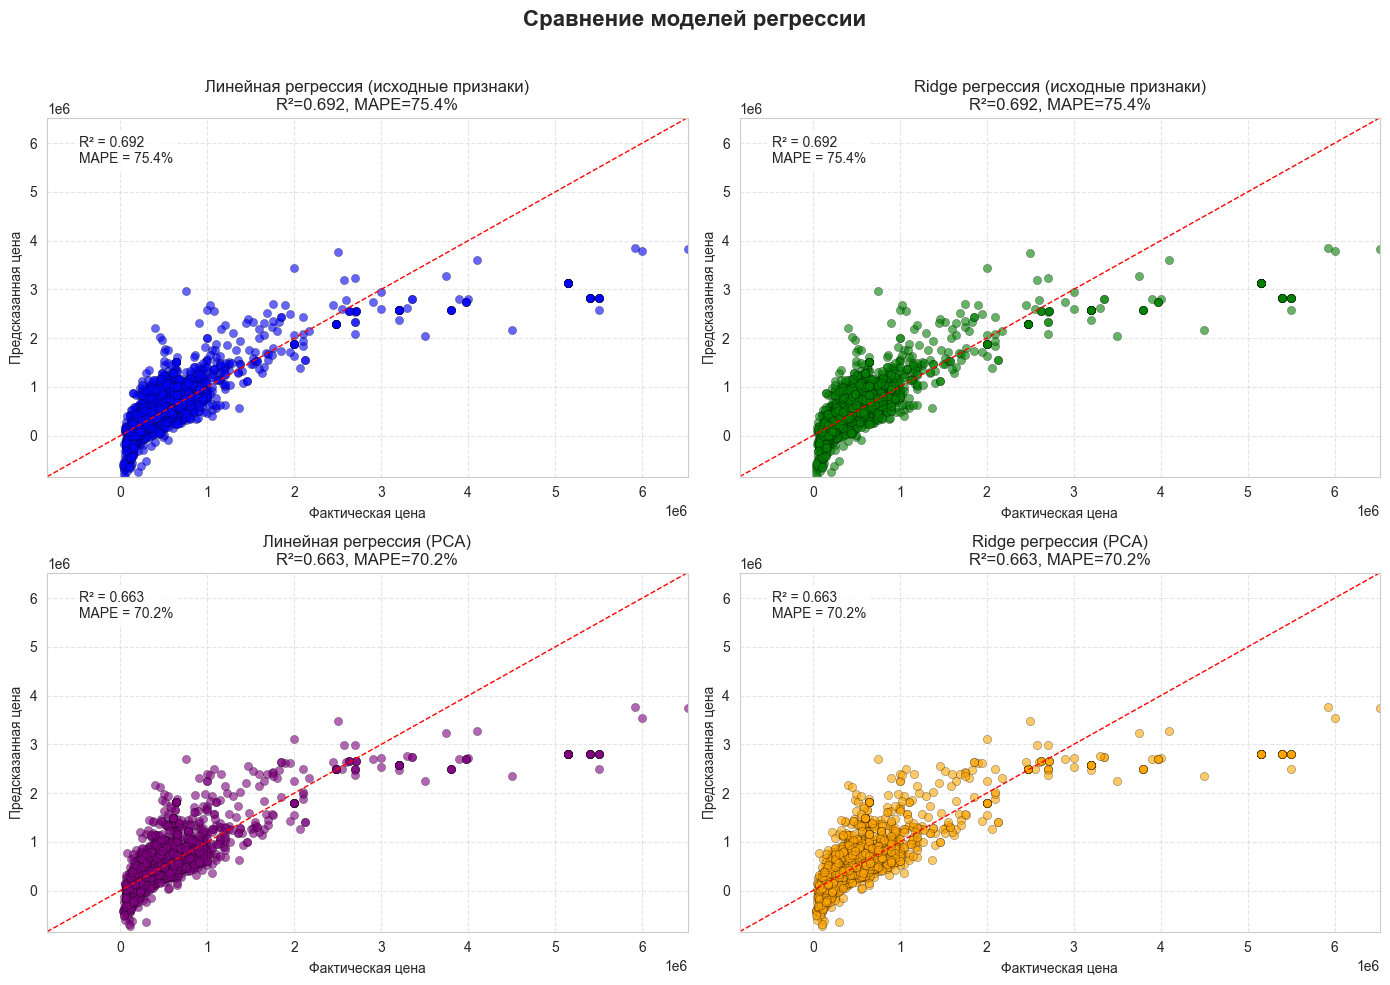


            Модель     R²  MAPE    RMSE
Linear (исходные) 0.6917 75.4% 438,367
 Ridge (исходные) 0.6917 75.4% 438,365
     Linear (PCA) 0.6629 70.2% 458,422
      Ridge (PCA) 0.6629 70.2% 458,420


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import pandas as pd

models_orig = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0)
}

for name, model in models_orig.items():
    model.fit(X_train_orig, y_train)

models_pca = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0)
}

for name, model in models_pca.items():
    model.fit(X_train_pca, y_train_pca)

y_pred_lr_orig = models_orig["Linear"].predict(X_test_orig)
y_pred_ridge_orig = models_orig["Ridge"].predict(X_test_orig)
y_pred_lr_pca = models_pca["Linear"].predict(X_test_pca)
y_pred_ridge_pca = models_pca["Ridge"].predict(X_test_pca)

global_min = min(y_test.min(), y_pred_lr_orig.min(), y_pred_ridge_orig.min(),
                 y_pred_lr_pca.min(), y_pred_ridge_pca.min())
global_max = max(y_test.max(), y_pred_lr_orig.max(), y_pred_ridge_orig.max(),
                 y_pred_lr_pca.max(), y_pred_ridge_pca.max())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Сравнение моделей регрессии", fontsize=16, fontweight='bold')

plots = [
    (axes[0, 0], y_test, y_pred_lr_orig, "Линейная регрессия (исходные признаки)", 'blue'),
    (axes[0, 1], y_test, y_pred_ridge_orig, "Ridge регрессия (исходные признаки)", 'green'),
    (axes[1, 0], y_test, y_pred_lr_pca, "Линейная регрессия (PCA)", 'purple'),
    (axes[1, 1], y_test, y_pred_ridge_pca, "Ridge регрессия (PCA)", 'orange')
]

for ax, y_true, y_pred, title, color in plots:
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100 

    ax.scatter(y_true, y_pred, alpha=0.6, color=color, s=35, edgecolors='k', linewidths=0.3)
    ax.plot([global_min, global_max], [global_min, global_max], 'r--', lw=1)

    ax.set_title(f"{title}\nR²={r2:.3f}, MAPE={mape:.1f}%", fontsize=12)
    ax.set_xlabel("Фактическая цена", fontsize=10)
    ax.set_ylabel("Предсказанная цена", fontsize=10)
    ax.set_xlim(global_min, global_max)
    ax.set_ylim(global_min, global_max)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax.text(0.05, 0.95, f'R² = {r2:.3f}\nMAPE = {mape:.1f}%', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

results = []
models_info = [
    ("Linear (исходные)", y_test, y_pred_lr_orig),
    ("Ridge (исходные)", y_test, y_pred_ridge_orig),
    ("Linear (PCA)", y_test, y_pred_lr_pca),
    ("Ridge (PCA)", y_test, y_pred_ridge_pca)
]

for name, y_true, y_pred in models_info:
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    results.append({
        'Модель': name,
        'R²': f'{r2:.4f}',
        'MAPE': f'{mape:.1f}%',
        'RMSE': f'{rmse:,.0f}'
    })

results_df = pd.DataFrame(results)
print("\n", results_df.to_string(index=False))